# Aplicación de Redes Neuronales a un problema de clasificación

## Este notebook implementa una serie de modelos de aprendizaje automático para un problema de clasificación binario relacionado con el riesgo de crédito.

### Implementado por Edgar Varcarcel para Damian Sire :D!

# Paso 1 : Importar librerías necesarias

### Se importarán diferentes clases de librerias relacionadas con el procesamiento de información, los modelos a implementar, y herramientas para visualizar la información.

In [26]:
# Librerias básicas de procesamiento de información

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Librerias para visualizar información

import matplotlib.pyplot as plt
from sklearn import tree

# Modelos clásicos de aprendizaje automático

from sklearn.neighbors import KNeighborsClassifier # Vecinos más cercanos
from sklearn.tree import DecisionTreeClassifier # Árbol de decisión

# Modelos de redes neuronales

# En caso de no tener los módulos necesarios, ejecutar los siguientes comandos abajo comentados:
# pip install keras
# pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense

# Librerías para evaluación de desempeño de los modelos
from sklearn.metrics import confusion_matrix # Matriz de confusión
from sklearn.metrics import accuracy_score # Reporte detallado de las métricas del modelo

print("\n" + "Librerías cargadas con éxito")


Librerías cargadas con éxito


# Paso 2: Importar la información

### En este paso se cargará la base de datos con el cual se entrenarán los modelos. Para este ejemplo, se utilizará la base de German Credit disponible en http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/

In [27]:
# Cargar la base de datos

Data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data' , sep = " ", header = None)
Data

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# Paso 3: Caracterizar la información

### La base que se cargó en el paso anterior no indica lo que representa cada una de las características, por tanto, se nombrarán de acuerdo a la descripción de los datos definidos en http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

In [28]:
# Definir los nombres de las columnas

columnas = ['Account_Status' , 'Acount_Duration (months)' , 'Credit_History' , 
           'Credit_Purpose' , 'Credit_Amount' , 'Saving_Account' , 'Job_Experience (years)',
           'Installment_Rate (%)' , 'Personal_Status and Sex' , 'Ohter_Debtors' , 'Present_Residence_Duration' , 
           'Property_Type' , 'Age (years)' , 'Other_Installment_Plans' , 'Housing_Type' , 
           'Number_of_Credits' , 'Job_Type' , 'Number_of_people_you_maintain','Phone_Number' , 'Foreign_Worker' , 'Response_Variable (1 = Good , 2 = Bad)']

# Asignar columnas a la base
Data.columns = columnas
Data

,Account_Status,Acount_Duration (months),Credit_History,Credit_Purpose,Credit_Amount,Saving_Account,Job_Experience (years),Installment_Rate (%),Personal_Status and Sex,Ohter_Debtors,...,Property_Type,Age (years),Other_Installment_Plans,Housing_Type,Number_of_Credits,Job_Type,Number_of_people_you_maintain,Phone_Number,Foreign_Worker,"Response_Variable (1 = Good , 2 = Bad)"
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [35]:
# Seleccionar las variables a utilizar en el modelo, para el ejemplo sólo trabajaremos con variables numéricas. Se puede utilizar
# para futuros ejercicios las variables categóricas previamente transformadas

Data_2 = Data[['Acount_Duration (months)' , 'Credit_Amount' , 'Installment_Rate (%)' , 'Present_Residence_Duration' , 
           'Age (years)' , 'Number_of_Credits' , 'Number_of_people_you_maintain', 'Response_Variable (1 = Good , 2 = Bad)']]

Data_2

,Acount_Duration (months),Credit_Amount,Installment_Rate (%),Present_Residence_Duration,Age (years),Number_of_Credits,Number_of_people_you_maintain,"Response_Variable (1 = Good , 2 = Bad)"
0,6,1169,4,4,67,2,1,1
1,48,5951,2,2,22,1,1,2
2,12,2096,2,3,49,1,2,1
3,42,7882,2,4,45,1,2,1
4,24,4870,3,4,53,2,2,2
...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,1
996,30,3857,4,4,40,1,1,1
997,12,804,4,4,38,1,1,1
998,45,1845,4,4,23,1,1,2


# Paso 4: Análisis de los datos

### Se realizará un análisis descriptivo a las variables predictoras y a las variables de respuesta.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026947535FD0>]],
      dtype=object)

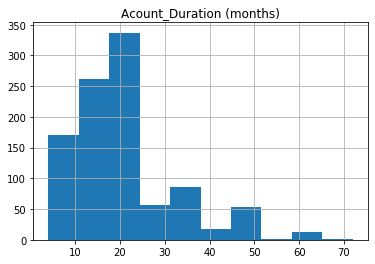

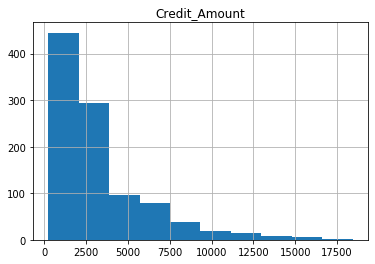

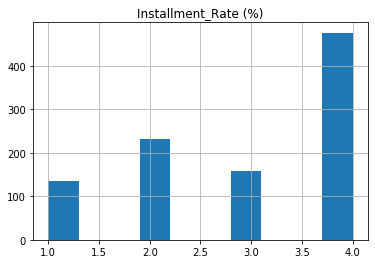

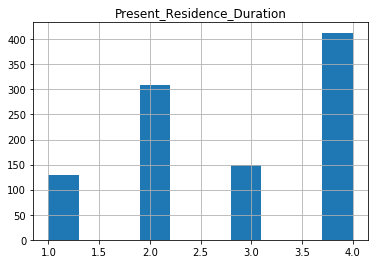

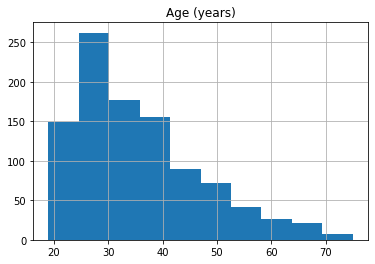

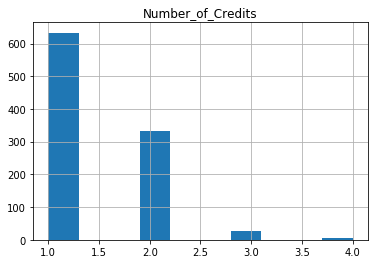

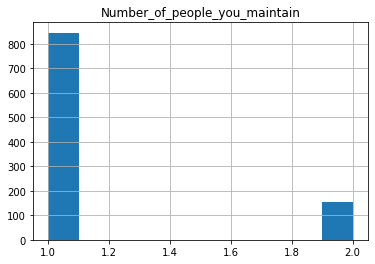

In [30]:
# Histograma para las variables numéricas

columnas_2 = ['Acount_Duration (months)' , 'Credit_Amount' , 'Installment_Rate (%)' , 'Present_Residence_Duration' , 
           'Age (years)' , 'Number_of_Credits' , 'Number_of_people_you_maintain', ]

Data_2[['Acount_Duration (months)']].hist()
Data_2[['Credit_Amount']].hist()
Data_2[['Installment_Rate (%)']].hist()   
Data_2[['Present_Residence_Duration']].hist()   
Data_2[['Age (years)']].hist()   
Data_2[['Number_of_Credits']].hist()   
Data_2[['Number_of_people_you_maintain']].hist()   


In [31]:
# Estadísticas básicas:

Data_2.describe()

,Acount_Duration (months),Credit_Amount,Installment_Rate (%),Present_Residence_Duration,Age (years),Number_of_Credits,Number_of_people_you_maintain,"Response_Variable (1 = Good , 2 = Bad)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


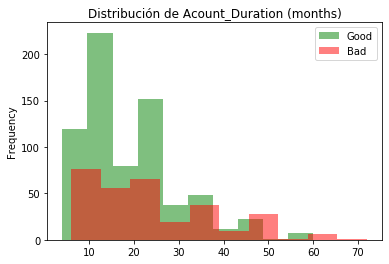

In [32]:
# Definir función para hacer histograma múltiple, con la finalidad de observar distirbución de la variable
# predictora con respecto a la variable de respuesta.

kwargs = dict(alpha=0.5, bins=10)

def make_multi_histogram(column_name):
    plt.hist(Data_2[[column_name]][Data_2['Response_Variable (1 = Good , 2 = Bad)'] == 1].values, **kwargs, color='g', label='Good')
    plt.hist(Data_2[[column_name]][Data_2['Response_Variable (1 = Good , 2 = Bad)'] == 2].values, **kwargs, color='r', label='Bad')
    plt.gca().set(title='Distribución de ' + column_name, ylabel='Frequency')
    plt.legend();

make_multi_histogram('Acount_Duration (months)')

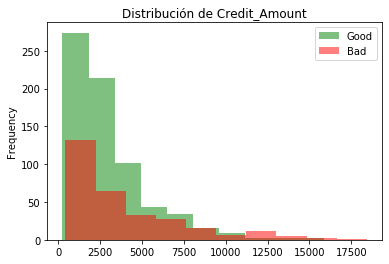

In [33]:
make_multi_histogram('Credit_Amount')

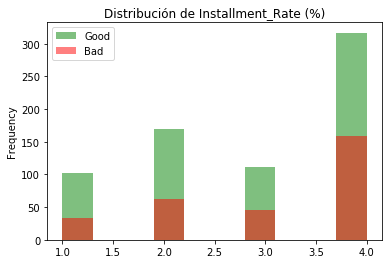

In [9]:
make_multi_histogram('Installment_Rate (%)')

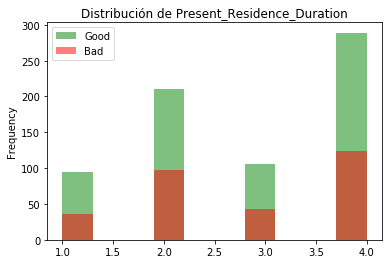

In [10]:
make_multi_histogram('Present_Residence_Duration')

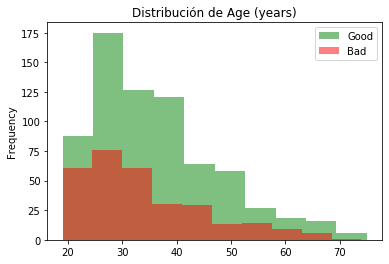

In [11]:
make_multi_histogram('Age (years)')

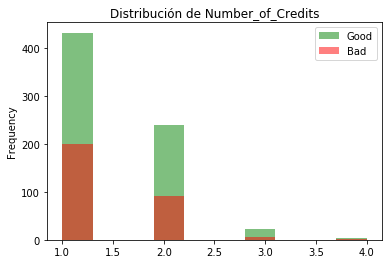

In [12]:
make_multi_histogram('Number_of_Credits')

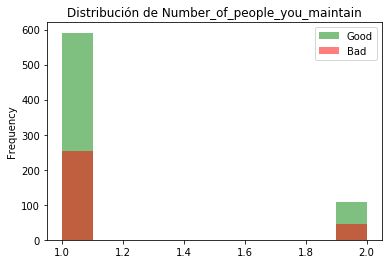

In [13]:
make_multi_histogram('Number_of_people_you_maintain')

# Paso 5: Definición, entrenamiento y evaluación de los modelos

### Ahora, crearemos los modelos para predecir el valor de la variable de respuesta y se evaluarán con una serie de indicadores de desempeño.

In [36]:
# Separar la base en prueba y entrenamiento

X_train , X_test , Y_train , Y_test = train_test_split(Data_2.drop(['Response_Variable (1 = Good , 2 = Bad)'] , axis = 1) , 
                                                       Data_2['Response_Variable (1 = Good , 2 = Bad)'] ,
                                                      test_size = 0.2 , random_state = 123)

# Crear los objetos de los modelos a entrenar

# KNN

KNN = KNeighborsClassifier()

# Árbol de decisión

Arbol = DecisionTreeClassifier()


X_train , X_test , Y_train , Y_test 

(     Acount_Duration (months)  Credit_Amount  Installment_Rate (%)  \
 512                        15           2687                     2   
 685                        60           6527                     4   
 997                        12            804                     4   
 927                        48          10297                     4   
 376                        18           2320                     2   
 ..                        ...            ...                   ...   
 988                        24           6579                     4   
 322                        24           2910                     2   
 382                        22           1283                     4   
 365                        12           1542                     2   
 510                        12            759                     4   
 
      Present_Residence_Duration  Age (years)  Number_of_Credits  \
 512                           4           26                  1   
 685      

In [38]:
# Red Neuronal

numero_neuronas = 200 # Declarar el número de neuronas
Red = Sequential() # Crear el modelo de la red neuronal
Red.add(Dense(numero_neuronas , input_dim = X_train.shape[1] , activation = 'relu')) # Agregamos una capa inicial
Red.add(Dense(numero_neuronas , activation = 'relu')) # Agregamos otra capa intermedia
Red.add(Dense(1 , activation = 'sigmoid')) # Agregamos la capa de salida
Red.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Compilamos el modelo

Red.summary() # Resúmen del modelo

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               1600      
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 42,001
Trainable params: 42,001
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Entrenar KNN
KNN.fit(X_train , Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
# Entrenar Arbol
Arbol.fit(X_train , Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [41]:
# Entrenar red
Red.fit(X_train , Y_train , epochs = 100)

Epoch 1/100
800/800 [==============================] - 0s 443us/step - loss: -484.0075 - accuracy: 0.6237
Epoch 2/100
800/800 [==============================] - 0s 101us/step - loss: -2349.7464 - accuracy: 0.7013
Epoch 3/100
800/800 [==============================] - 0s 99us/step - loss: -7073.1259 - accuracy: 0.7013
Epoch 4/100
800/800 [==============================] - 0s 92us/step - loss: -18243.8140 - accuracy: 0.7013
Epoch 5/100
800/800 [==============================] - 0s 108us/step - loss: -39850.3338 - accuracy: 0.7013
Epoch 6/100
800/800 [==============================] - 0s 90us/step - loss: -77858.7038 - accuracy: 0.7013
Epoch 7/100
800/800 [==============================] - 0s 110us/step - loss: -135021.7912 - accuracy: 0.7013
Epoch 8/100
800/800 [==============================] - 0s 80us/step - loss: -218513.7812 - accuracy: 0.7013
Epoch 9/100
800/800 [==============================] - 0s 93us/step - loss: -333111.8916 - accuracy: 0.7013
Epoch 10/100
800/800 [============

800/800 [==============================] - 0s 103us/step - loss: -236592107.2000 - accuracy: 0.7013
Epoch 75/100
800/800 [==============================] - 0s 69us/step - loss: -245385479.0400 - accuracy: 0.7013
Epoch 76/100
800/800 [==============================] - 0s 77us/step - loss: -254242280.6400 - accuracy: 0.7013
Epoch 77/100
800/800 [==============================] - 0s 74us/step - loss: -263332470.4000 - accuracy: 0.7013
Epoch 78/100
800/800 [==============================] - 0s 86us/step - loss: -272678164.4800 - accuracy: 0.7013
Epoch 79/100
800/800 [==============================] - 0s 87us/step - loss: -282443211.5200 - accuracy: 0.7013
Epoch 80/100
800/800 [==============================] - 0s 85us/step - loss: -291842765.1200 - accuracy: 0.7013
Epoch 81/100
800/800 [==============================] - 0s 79us/step - loss: -301900573.1200 - accuracy: 0.7013
Epoch 82/100
800/800 [==============================] - 0s 93us/step - loss: -311872469.1200 - accuracy: 0.7013
Epoc

In [42]:
# Generar predicciones

Y_pred_KNN = KNN.predict(X_test)
Y_pred_arbol = Arbol.predict(X_test)
Y_pred_red = Red.predict(X_test)

Y_pred_compilado = pd.concat([pd.DataFrame(Y_pred_KNN) , pd.DataFrame(Y_pred_arbol) , pd.DataFrame(Y_pred_red)] , axis = 1)
Y_pred_compilado.columns = ['KNN' , 'Árbol de decisión' , 'Red Neuronal']

Y_pred_compilado

,KNN,Árbol de decisión,Red Neuronal
0,2,2,1.0
1,2,1,1.0
2,1,2,1.0
3,1,1,1.0
4,1,2,1.0
...,...,...,...
195,1,1,1.0
196,1,1,1.0
197,2,2,1.0
198,1,1,1.0


In [43]:
# Métricas de desempeño del KNN
confusion_matrix(Y_test , pd.DataFrame(Y_pred_KNN))

array([[110,  29],
       [ 40,  21]], dtype=int64)

In [45]:
# Métricas de desempeño de la red neuronal
confusion_matrix(Y_test , pd.DataFrame(Y_pred_red))

array([[139,   0],
       [ 61,   0]], dtype=int64)

In [44]:
# Métricas de desempeño árbol de decisión
confusion_matrix(Y_test , pd.DataFrame(Y_pred_arbol))

array([[90, 49],
       [34, 27]], dtype=int64)

In [46]:
# Puntaje del modelo

print('\n' + "Accuracy score del KNN : " + str(accuracy_score(Y_test , pd.DataFrame(Y_pred_KNN))))
print('\n' + "Accuracy score del Árbol de decisión : " + str(accuracy_score(Y_test , pd.DataFrame(Y_pred_arbol))))
print('\n' + "Accuracy score de la red neuronal : " + str(accuracy_score(Y_test , pd.DataFrame(Y_pred_red))))


Accuracy score del KNN : 0.655

Accuracy score del Árbol de decisión : 0.585

Accuracy score de la red neuronal : 0.695


[Text(189.28934447929987, 212.26285714285714, 'X[0] <= 27.5\ngini = 0.419\nsamples = 800\nvalue = [561, 239]'),
 Text(89.1072695212596, 201.90857142857143, 'X[1] <= 8630.5\ngini = 0.38\nsamples = 639\nvalue = [476, 163]'),
 Text(60.54653432704604, 191.5542857142857, 'X[0] <= 8.5\ngini = 0.372\nsamples = 631\nvalue = [475, 156]'),
 Text(8.562659846547314, 181.2, 'X[4] <= 35.5\ngini = 0.119\nsamples = 79\nvalue = [74, 5]'),
 Text(6.850127877237852, 170.84571428571428, 'X[1] <= 451.0\ngini = 0.245\nsamples = 35\nvalue = [30, 5]'),
 Text(3.425063938618926, 160.49142857142857, 'X[1] <= 388.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(1.712531969309463, 150.13714285714286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(5.137595907928389, 150.13714285714286, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(10.275191815856777, 160.49142857142857, 'X[1] <= 4064.5\ngini = 0.17\nsamples = 32\nvalue = [29, 3]'),
 Text(8.562659846547314, 150.13714285714286, 'X[4] <= 31.5\ngini = 0.121\

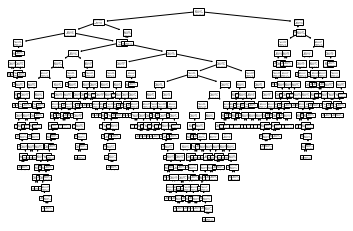

In [24]:
# Reglas del árbol
tree.plot_tree(Arbol)

### Se pudo observar que, para este problema en específico, la red obtuvo el mejor puntaje en la base de prueba, sin embargo, este se puede mejorar con procesos como optimización de hiperparámetros (Random / Grid Search) , modificación de la arquitectura de la red, balancear la base de datos, o aumentar el número de características (columnas) o registros (filas).

### Gracias.